Data Cleaning and Preprocessing

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf
# Read csv file
df = pd.read_csv('commits.csv')
df['Commited Date'] = pd.to_datetime(df['Commited Date'])
df = df.sort_values(by='Commited Date')
df.index = [i for i in range(1,df.shape[0]+1)]

# Correcting the Contributor column
for i in range(1,df.shape[0]+1):
    if df.loc[i,'Author'] == df.loc[i,'Contributor']:
        df.loc[i,'Contributor'] = df.loc[i,'Author'].replace(' ','')
# Detect which Authors changed their Github name and change their Contributor id to the latest time
dict = {df.loc[i,'Author'] : df.loc[i,'Contributor'] for i in range(1,df.shape[0]+1)}
for i in range(1,df.shape[0]+1):
    df.loc[i,'Contributor'] = dict[df.loc[i,'Author']]
# Set commited date as index
df.set_index('Commited Date', inplace=True)
df['Month'] = df.index.to_period('M')
df.head()

,Author,Commit Message,Contributor,Files,Passed,Month
Commited Date,,,,,,
2023-01-02,Zeeshan Tamboli,[docs] Fix demo code selection through copy sh...,ZeeshanTamboli,['docs/src/modules/utils/CodeCopy.tsx'],Success,2023-01
2023-01-02,Olivier Tassinari,[docs] Fix content wider than screen regressio...,oliviertassinari,['docs/src/modules/components/AppLayoutDocs.js'],Success,2023-01
2023-01-02,Olivier Tassinari,[website] Improve Lead Designer role descripti...,oliviertassinari,"['docs/pages/careers.tsx', 'docs/src/pages/car...",Success,2023-01
2023-01-02,Olivier Tassinari,[test] Always use & for nesting styles (#35702),oliviertassinari,"['packages/mui-system/src/Box/Box.spec.tsx', '...",Success,2023-01
2023-01-02,Benny Joo,v5.11.3 (#35708),hbjORbj,"['CHANGELOG.md', 'benchmark/package.json', 'do...",Success,2023-01


In [79]:
date_df = pd.DataFrame(index=np.unique(df.index.values))
date_df.index.name = 'Months'
date_df['Commits'] = df.index.value_counts()
date_df['Month'] = date_df.index.to_period('M')
date_df.head()

,Commits,Month
Months,,
2023-01-02,15,2023-01
2023-01-03,5,2023-01
2023-01-04,4,2023-01
2023-01-05,3,2023-01
2023-01-06,1,2023-01


Top 5 Months with the most Commits

In [80]:
monthly_counts = date_df.groupby('Month')['Commits'].sum()
monthly_counts.sort_values(ascending=False).head()

Month
2023-08    280
2023-07    273
2023-09    266
2023-10    255
2023-11    207
Freq: M, Name: Commits, dtype: int64

Visualization

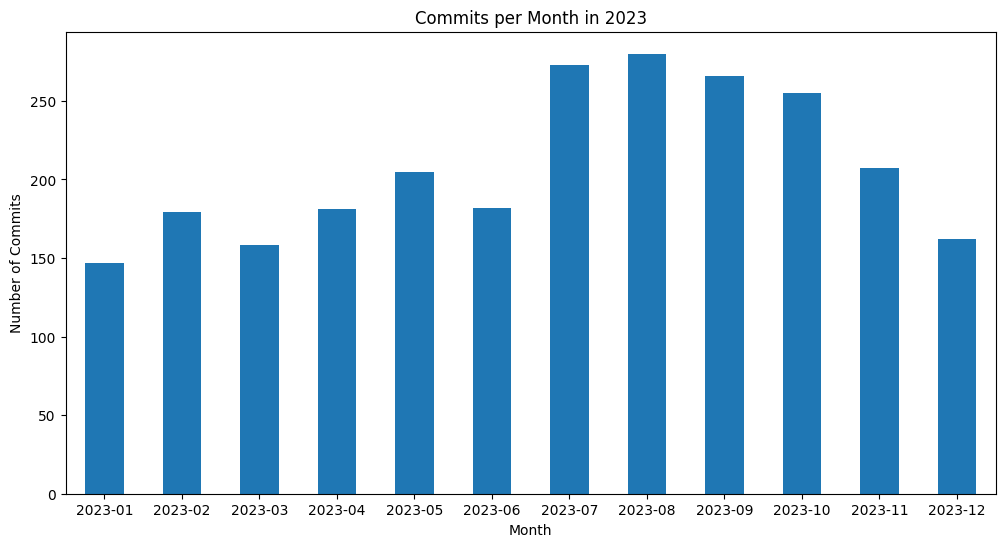

In [81]:
monthly_counts.plot(kind = 'bar',title = 'Commits per Month in 2023',ylabel="Number of Commits", figsize=(12, 6))
plt.xticks(rotation=0) 
plt.show()

Total Contributors in 2023

In [82]:
df['Author'].unique().size

256

Setting up a dataframe for Contributors

In [83]:
contributor_df = pd.DataFrame(index=df['Contributor'].unique())
contributor_df.index.name = 'Contributor'
contributor_df['Author'] = df['Author'].unique()
contributor_df['Total Commits'] = df['Contributor'].value_counts()
rates = {}
for i in df['Contributor'].unique():
    rate = df['Passed'][(df['Contributor'] == i) & (df['Passed'] == 'Success')].size
    rates[i] = str(rate/df['Passed'][df['Contributor'] == i].size*100) + '%'
contributor_df['Success Rate'] = rates
contributor_df

,Author,Total Commits,Success Rate
Contributor,,,
ZeeshanTamboli,Zeeshan Tamboli,71,69.01408450704226%
oliviertassinari,Olivier Tassinari,354,51.41242937853108%
hbjORbj,Benny Joo,71,84.50704225352112%
renovate[bot],renovate[bot],737,40.027137042062414%
mnajdova,Marija Najdova,83,71.08433734939759%
...,...,...,...
adamhylander,adamhylander,1,0.0%
muazaqdas,Muaz Aqdas,1,0.0%
Kamino0,Kamino0,1,100.0%


Top 5 Contributors in 2023

In [84]:
contributor_df.sort_values(by = 'Total Commits', ascending=False, inplace=True)
contributor_df.head()

,Author,Total Commits,Success Rate
Contributor,,,
renovate[bot],renovate[bot],737,40.027137042062414%
oliviertassinari,Olivier Tassinari,354,51.41242937853108%
danilo-leal,Danilo Leal,146,56.16438356164384%
sai6855,sai chand,106,62.264150943396224%
siriwatknp,Siriwat K,99,75.75757575757575%


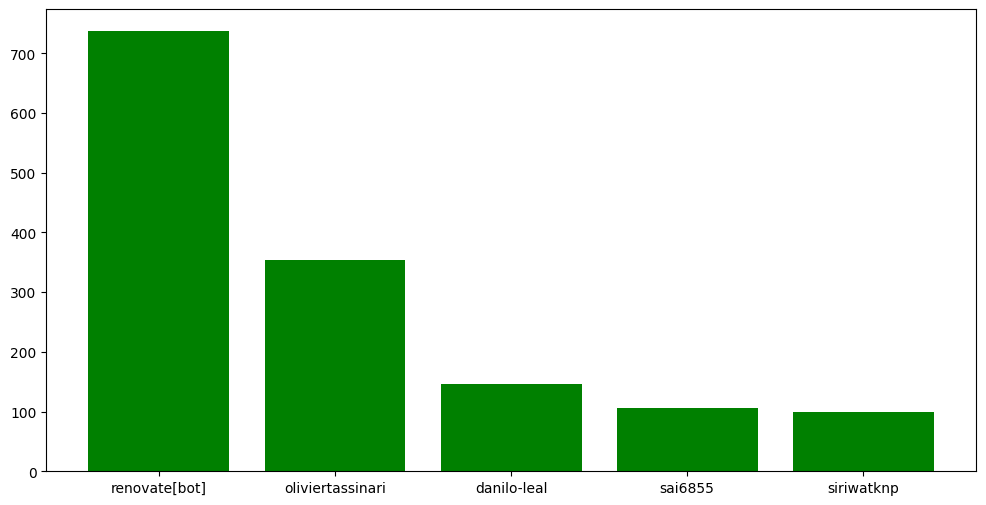

In [85]:
topfive_df = contributor_df.head(5)
plt.figure(figsize=(12, 6))
plt.bar(topfive_df.index,topfive_df['Total Commits'],color='green')
plt.show()

Annual activity frequency of the 5 most active contributors

In [86]:
contributor_commits = df.groupby('Month')['Contributor'].value_counts().unstack(fill_value=0)
for i in df['Contributor'].unique():
    contributor_commits.drop(i,axis=1,inplace=True) if i != 'renovate[bot]' and i != 'oliviertassinari' and i != 'danilo-leal' and i != 'sai6855' and i != 'siriwatknp' else i
contributor_commits.index.name = 'Months'
contributor_commits

Contributor,danilo-leal,oliviertassinari,renovate[bot],sai6855,siriwatknp
Months,,,,,
2023-01,0,21,41,9,10
2023-02,2,21,53,8,16
2023-03,2,20,35,11,12
2023-04,7,22,42,12,11
2023-05,6,8,73,9,8
2023-06,13,32,60,6,8
2023-07,11,48,83,8,9
2023-08,37,51,68,8,6
2023-09,23,54,65,14,5


<Axes: xlabel='Months'>

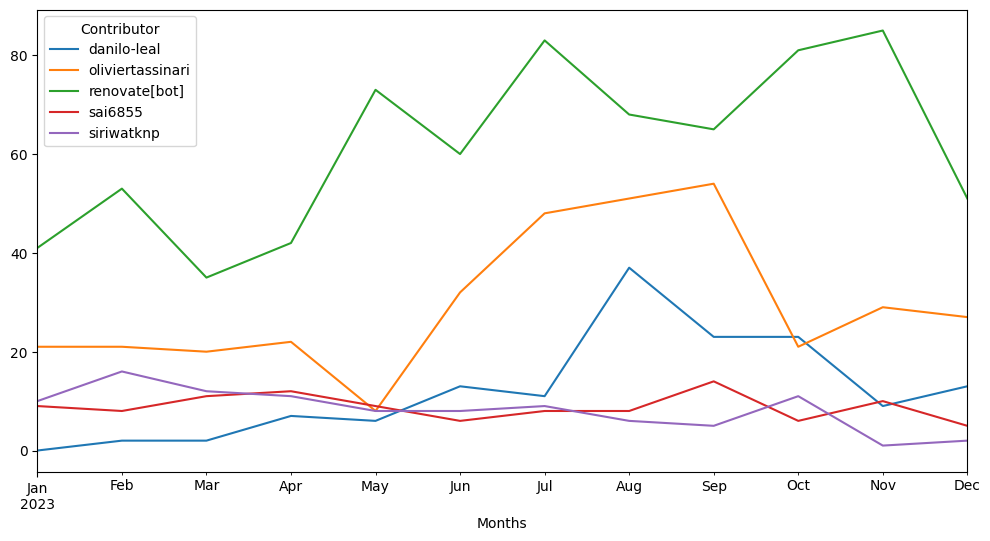

In [87]:
contributor_commits.plot(kind = 'line', figsize = (12,6))

Growth of Repository by Month

In [88]:
grow_df = monthly_counts.to_frame().cumsum()
used = set()
contributor = []
for month in df['Month'].unique():
    contributors = df[df['Month'] == month]['Contributor']
    for contributorr in contributors:
        used.add(contributorr)
    contributor.append(len(used))
grow_df['Contributors'] = contributor 
grow_df

,Commits,Contributors
Month,,
2023-01,147,40
2023-02,326,58
2023-03,484,82
2023-04,665,97
2023-05,870,125
2023-06,1052,142
2023-07,1325,165
2023-08,1605,186
2023-09,1871,206


<Axes: xlabel='Month'>

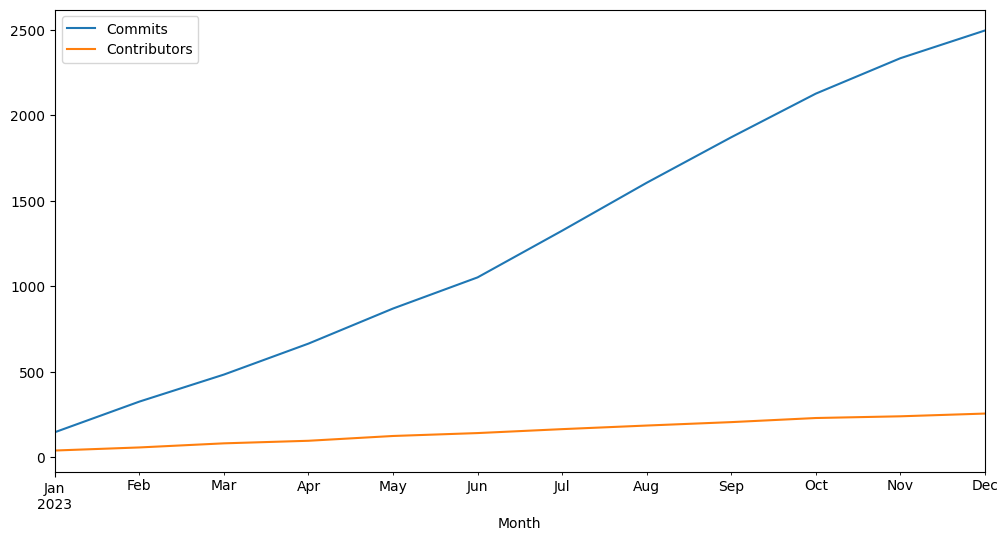

In [106]:
grow_df.plot(figsize = (12,6))

Purpose in Commit Message

In [101]:
adds = 0
updates = 0
fixs = 0
removes = 0
bumps = 0
renames = 0
revises = 0
replaces = 0
for i in df['Commit Message']:
    if 'add' in i.lower(): 
        adds+=1
    if 'update' in i.lower():
        updates+=1
    if 'fix' in i.lower():
        fixs+=1
    if 'remove' in i.lower():
        removes+=1
    if 'bump' in i.lower():
        bumps+=1
    if 'rename' in i.lower():
        renames+=1
    if 'revise' in i.lower():
        revises+=1
    if 'replace' in i.lower():
        replaces+=1
word_df = pd.DataFrame(index=['Add','Update','Fix','Remove','Bump','Rename','Revise','Replace'])
word_df['Total Counts'] = [adds,updates,fixs,removes,bumps,renames,revises,replaces]
word_df

,Total Counts
Add,333
Update,94
Fix,472
Remove,98
Bump,756
Rename,13
Revise,29
Replace,25


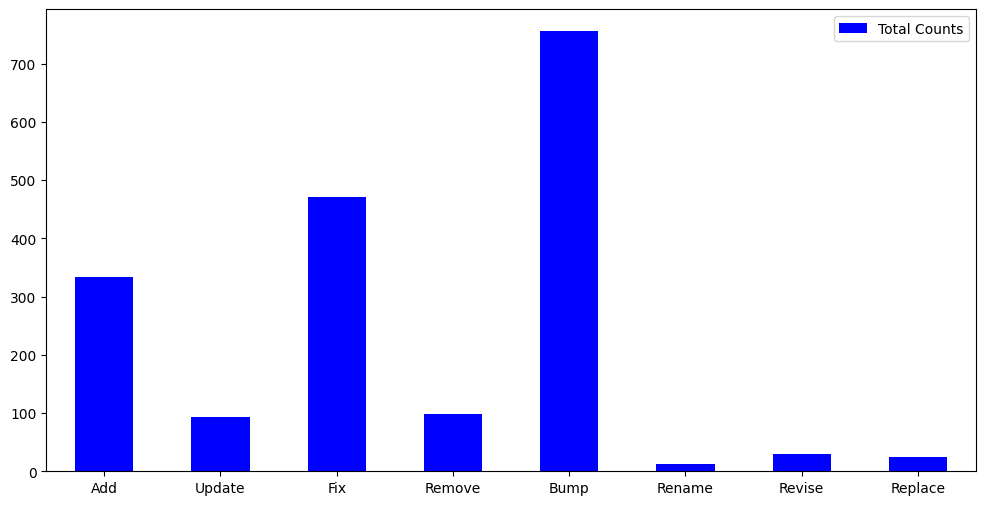

In [105]:
word_df.plot(kind = 'bar', figsize = (12,6), color = 'blue')
plt.xticks(rotation=0) 
plt.show()